### Importacion de series financieras y estimación de volatilidades

In [1]:
import pandas as pd
import numpy as np
import math
from scipy.stats import kurtosis
import matplotlib.pyplot as plt
import yfinance as yf
from arch import arch_model 

Definición de series financieras y sus tickers

In [2]:
series = {
    "^GSPC": "S&P 500",
    "^DJI": "Dow Jones Industrail Average",
    "^IXIC": "Nasdaq Composite",
    "^FTSE": "FTSE 100",
    "^N225": "Nikkei 225",
    "^HSI": "HSI",
    "^TNX": "Treasury Yield 10 Years",
    "HG=F": "Copper Futures",
    "SI=F": "Silver Futures",
    #"CL=F": "Crude Oil Futures",
    "GC=F": "Gold Futures",
    "PL=F": "Platinum Futures",
    "NG=F": "Natural Gas Futures",
    "ZC=F": "Corn Futures",
    "ZM=F": "Soybean Meal Futures"
}

series_keys = list(series.keys())
series_name = list(series.values())

In [3]:
data = pd.DataFrame()

for key in series_keys:
    series_data = yf.Ticker(key).history(period="max")
    series_data.reset_index(inplace=True)

    # Renombrando
    series_data[key] = series_data.Close
    
    # Unión
    if data.empty is True:
        data = pd.concat([data, series_data[["Date", key]]])
    else:
        data = pd.merge(data, series_data[["Date", key]], how="left")

In [4]:
data.set_index("Date", inplace=True)
data = data.rename(series, axis = 1)
data.sort_index()
data = data[data.index >= "1999-01-01"]

data

,S&P 500,Dow Jones Industrail Average,Nasdaq Composite,FTSE 100,Nikkei 225,HSI,Treasury Yield 10 Years,Copper Futures,Silver Futures,Gold Futures,Platinum Futures,Natural Gas Futures,Corn Futures,Soybean Meal Futures
Date,,,,,,,,,,,,,,
1999-01-04,1228.099976,9184.269531,2208.050049,5879.399902,13415.889648,9809.169922,4.677,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-05,1244.780029,9311.190430,2251.270020,5958.200195,13232.740234,9891.059570,4.729,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-06,1272.339966,9544.969727,2320.860107,6148.799805,13468.459961,10233.799805,4.721,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-07,1269.729980,9537.759766,2326.090088,6101.200195,13536.559570,10693.570312,4.765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-08,1275.089966,9643.320312,2344.409912,6147.200195,13391.809570,10722.700195,4.842,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-07,3933.919922,33597.921875,10958.549805,7489.200195,27686.400391,18814.820312,3.408,3.8555,22.709999,1785.500000,1024.500000,5.723,627.75,462.200012
2022-12-08,3963.510010,33781.480469,11082.000000,7472.200195,27574.429688,19450.230469,3.491,3.8805,23.063000,1788.699951,1027.599976,5.962,632.00,469.299988
2022-12-09,3934.379883,33476.460938,11004.620117,7476.600098,27901.009766,19900.869141,3.567,3.8760,23.535000,1798.099976,1049.199951,6.245,634.75,471.700012


Se eliminan los missings values

In [5]:
data = data.dropna()
data

,S&P 500,Dow Jones Industrail Average,Nasdaq Composite,FTSE 100,Nikkei 225,HSI,Treasury Yield 10 Years,Copper Futures,Silver Futures,Gold Futures,Platinum Futures,Natural Gas Futures,Corn Futures,Soybean Meal Futures
Date,,,,,,,,,,,,,,
2000-08-30,1502.589966,11103.009766,4103.810059,6615.100098,16901.669922,17095.880859,5.800,0.8850,4.930000,273.899994,591.400024,4.805,181.50,166.600006
2000-08-31,1517.680054,11215.099609,4206.350098,6672.700195,16861.259766,17097.509766,5.729,0.8850,5.003000,278.299988,586.700012,4.780,182.00,170.800003
2000-09-01,1520.770020,11238.780273,4234.330078,6795.000000,16739.779297,17333.609375,5.675,0.8890,5.004000,277.000000,595.299988,4.835,183.25,170.800003
2000-09-05,1507.079956,11260.610352,4143.180176,6752.500000,16452.269531,17595.220703,5.683,0.9060,4.998000,275.799988,601.299988,4.960,183.50,171.899994
2000-09-06,1492.250000,11310.639648,4013.340088,6694.700195,16399.869141,17605.230469,5.712,0.9015,4.983000,274.200012,611.099976,5.065,186.25,167.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-07,3933.919922,33597.921875,10958.549805,7489.200195,27686.400391,18814.820312,3.408,3.8555,22.709999,1785.500000,1024.500000,5.723,627.75,462.200012
2022-12-08,3963.510010,33781.480469,11082.000000,7472.200195,27574.429688,19450.230469,3.491,3.8805,23.063000,1788.699951,1027.599976,5.962,632.00,469.299988
2022-12-09,3934.379883,33476.460938,11004.620117,7476.600098,27901.009766,19900.869141,3.567,3.8760,23.535000,1798.099976,1049.199951,6.245,634.75,471.700012


Generando retornos:

In [6]:
def safe_log(column):
    return pd.DataFrame(list(map(lambda x: 0 if x <= 0 else math.log(x), column.values)))

In [7]:
data_r = pd.DataFrame()
data_r_index = data.index

for i in data.columns:
    var = (safe_log(data[i]) - safe_log(data[i]).shift(1))*100
    data_r[i] = var.rename(columns={0: i})

data_r.set_index(data_r_index, inplace=True)
data_r = data_r.dropna()
data_r

,S&P 500,Dow Jones Industrail Average,Nasdaq Composite,FTSE 100,Nikkei 225,HSI,Treasury Yield 10 Years,Copper Futures,Silver Futures,Gold Futures,Platinum Futures,Natural Gas Futures,Corn Futures,Soybean Meal Futures
Date,,,,,,,,,,,,,,
2000-08-31,0.999263,1.004483,2.467949,0.866968,-0.239376,0.009528,-1.231694,0.000000,1.469874,1.593657,-0.797901,-0.521642,0.275103,2.489753
2000-09-01,0.203391,0.210927,0.662982,1.816244,-0.723079,1.371453,-0.947041,0.450960,0.019994,-0.468212,1.455182,1.144055,0.684465,0.000000
2000-09-05,-0.904282,0.194050,-2.176148,-0.627424,-1.732445,1.497996,0.140868,1.894209,-0.119977,-0.434159,1.002850,2.552461,0.136333,0.641958
2000-09-06,-0.988893,0.443302,-3.183982,-0.859661,-0.319008,0.056873,0.508993,-0.497930,-0.300578,-0.581811,1.616661,2.094840,1.487519,-2.891906
2000-09-07,0.685200,-0.449876,2.096064,-0.082188,-0.608003,-0.989136,0.645673,0.497930,-0.967942,-0.072971,-0.755584,-1.331629,-2.859283,-1.326118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-07,-0.186411,0.004709,-0.512801,-0.429027,-0.717875,-3.274861,-3.034477,1.147786,2.618756,0.911447,1.583975,4.539739,0.359067,2.852947
2022-12-08,0.749363,0.544852,1.120221,-0.227252,-0.405245,3.321405,2.406260,0.646334,1.542427,0.179058,0.302127,4.091283,0.674740,1.524447
2022-12-09,-0.737672,-0.907020,-0.700698,0.058866,1.177400,2.290449,2.153667,-0.116036,2.025908,0.524147,2.080196,4.637515,0.434183,0.510102


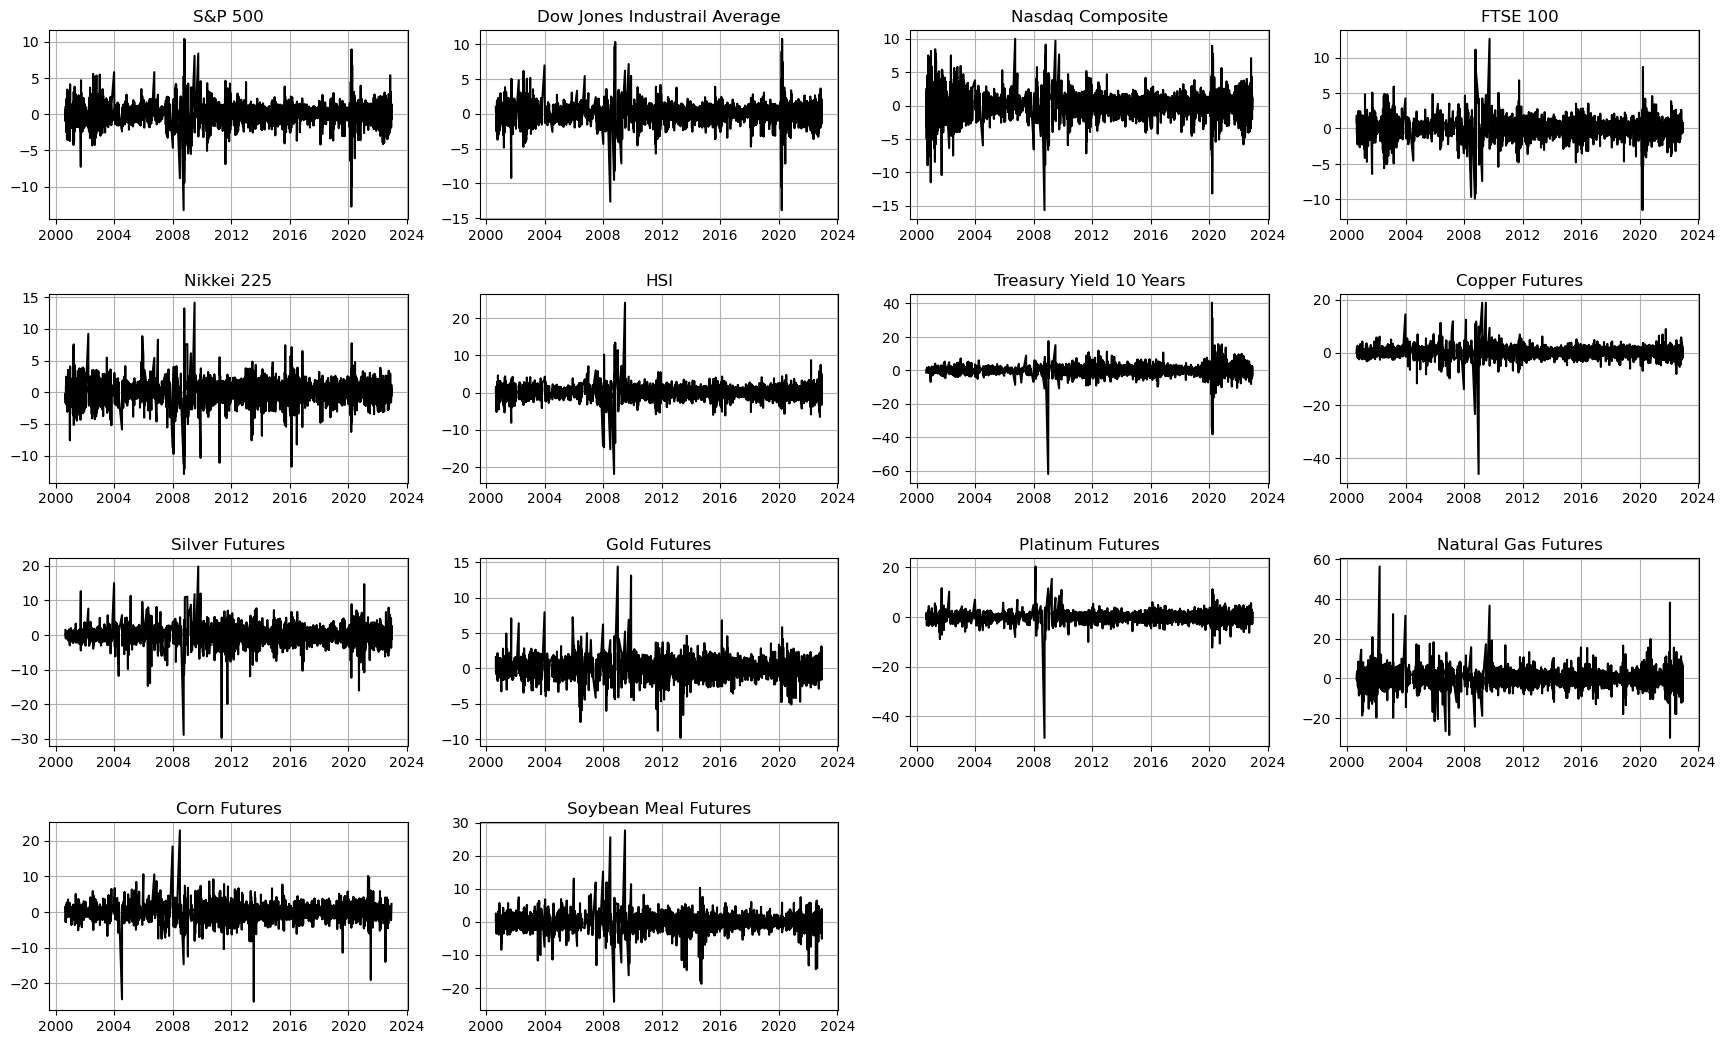

In [8]:
plt.figure(figsize=(30,14))

for i in enumerate(series_name):
    ax = plt.subplot(4, 4, i[0]+1)
    plt.plot(data_r.index, data_r[i[1]], color="black")
    plt.title(i[1])
    plt.grid(True)

plt.subplots_adjust(top=0.8, bottom=0.1, left=0.2, right=0.75, hspace=0.4, wspace=0.2)

plt.savefig("./figures/retornos.pdf")

Ahora es momento de estimar la volatilidad de cada serie. Para ello se usará un modelo GARCH(1,1) con distribucion t-student para capturar las colas pesadas. La necesidad de estimar con una t-student es evidente al observar las `distribuciones` de las series de los retornos y también sus `curtosis`

In [9]:
mu, sigma = 0, 1
normal_distribution = np.random.normal(mu, sigma, data_r.shape[0])

print(f"La kurtosis de una distribución normal es: {np.round(kurtosis(normal_distribution)+3, 3)}")

La kurtosis de una distribución normal es: 3.172


In [10]:
for i in enumerate(series_name):
    print(
        f"La curtosis de los retornos de {i[1]} es: {np.round(kurtosis(data_r[i[1]])+3, 3)}"
    )

La curtosis de los retornos de S&P 500 es: 15.446
La curtosis de los retornos de Dow Jones Industrail Average es: 18.238
La curtosis de los retornos de Nasdaq Composite es: 10.851
La curtosis de los retornos de FTSE 100 es: 14.273
La curtosis de los retornos de Nikkei 225 es: 12.965
La curtosis de los retornos de HSI es: 32.948
La curtosis de los retornos de Treasury Yield 10 Years es: 70.824
La curtosis de los retornos de Copper Futures es: 81.663
La curtosis de los retornos de Silver Futures es: 24.972
La curtosis de los retornos de Gold Futures es: 16.799
La curtosis de los retornos de Platinum Futures es: 119.104
La curtosis de los retornos de Natural Gas Futures es: 22.172
La curtosis de los retornos de Corn Futures es: 23.212
La curtosis de los retornos de Soybean Meal Futures es: 25.323


Entonces, se demuestra que es necesario modelar los errores como un t-student. Los modelos GARCH(1,1) son estimados a continuacion:

In [11]:
data_v = data_r.copy()

for i in data_r:
    garch = arch_model(data_r[i], p=1, q=1, dist="t")
    garch = garch.fit(disp=0)
    
    data_v[i] = garch.conditional_volatility

    print(f"Se estimo la volatilidad de: {i}")

Se estimo la volatilidad de: S&P 500
Se estimo la volatilidad de: Dow Jones Industrail Average
Se estimo la volatilidad de: Nasdaq Composite
Se estimo la volatilidad de: FTSE 100
Se estimo la volatilidad de: Nikkei 225
Se estimo la volatilidad de: HSI
Se estimo la volatilidad de: Treasury Yield 10 Years
Se estimo la volatilidad de: Copper Futures
Se estimo la volatilidad de: Silver Futures
Se estimo la volatilidad de: Gold Futures
Se estimo la volatilidad de: Platinum Futures
Se estimo la volatilidad de: Natural Gas Futures
Se estimo la volatilidad de: Corn Futures
Se estimo la volatilidad de: Soybean Meal Futures


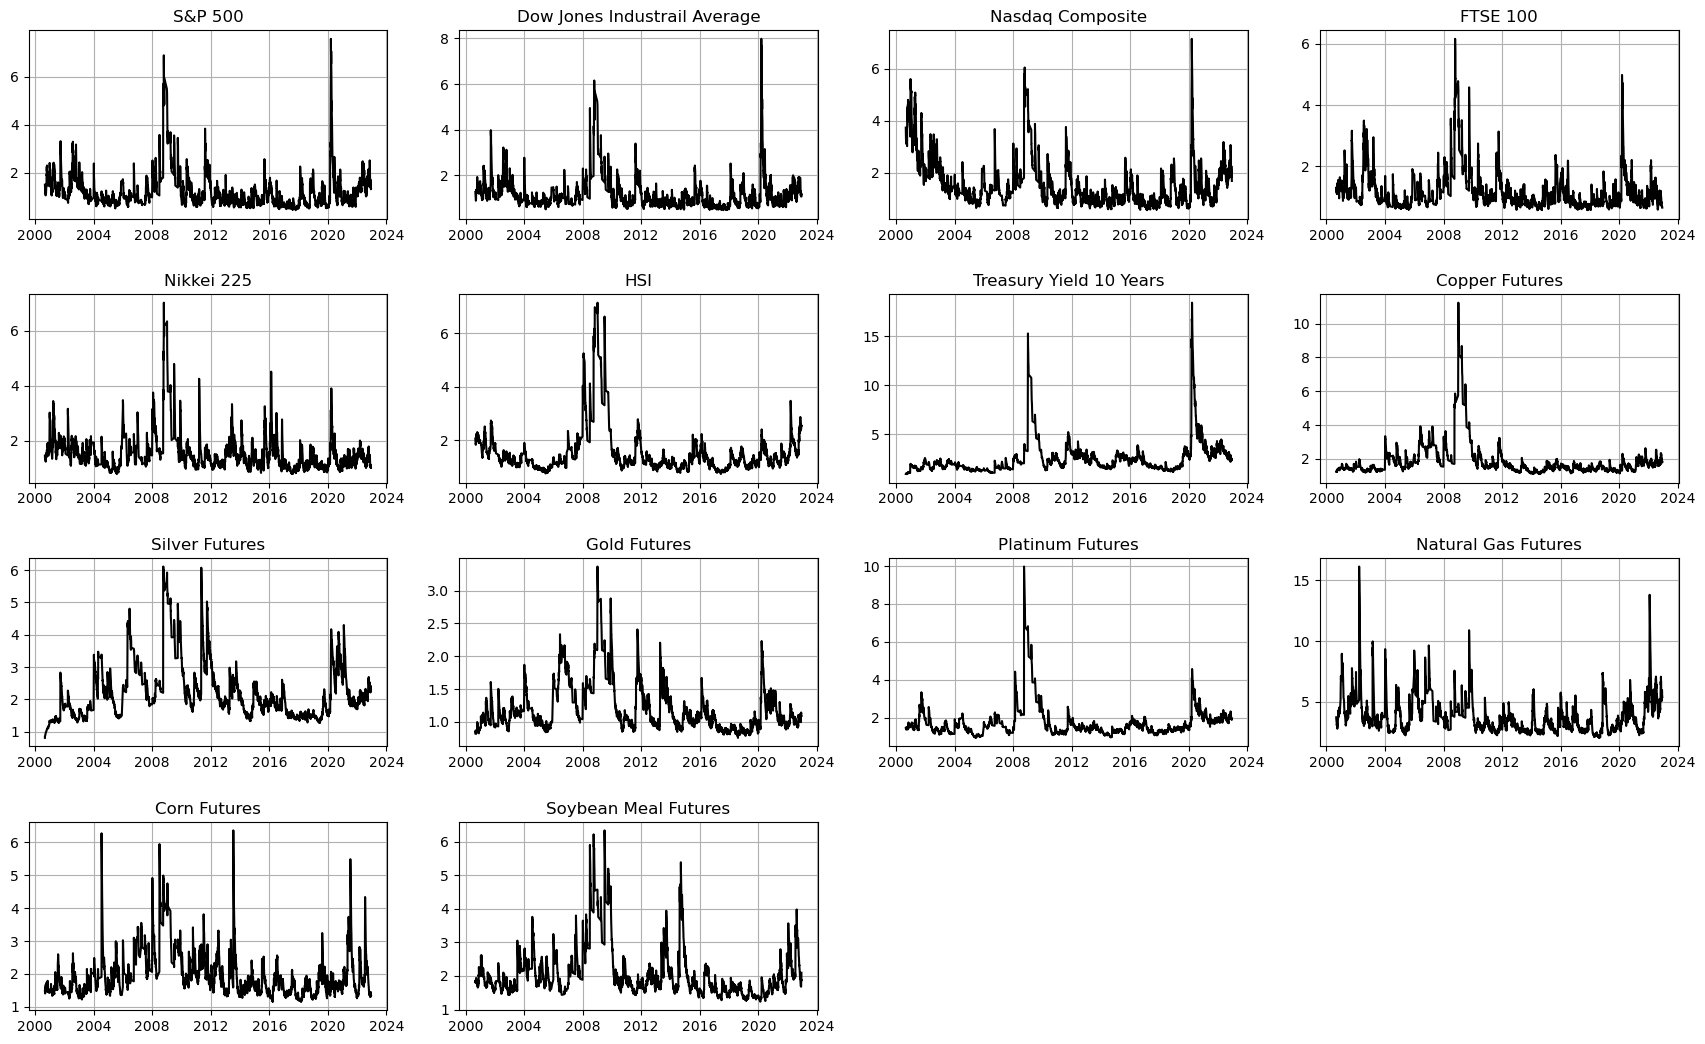

In [12]:
plt.figure(figsize=(30,14))

for i in enumerate(series_name):
    ax = plt.subplot(4, 4, i[0]+1)
    plt.plot(data_v.index, data_v[i[1]], color="black")
    plt.title(i[1])
    plt.grid(True)

plt.subplots_adjust(top=0.8, bottom=0.1, left=0.2, right=0.75, hspace=0.4, wspace=0.2)

plt.savefig("./figures/volatilidades.pdf")

In [13]:
data_v.to_excel("./data/volatilidades.xlsx")

Ademas, dada la existencia de un índice de incertidumbre muy usada en la literatura que es el `CBOE Volatility Index` o tambien llamado `VIX`, se importara para luego realizar la comparativa

In [14]:
vix_d = yf.Ticker("^VIX").history(period="max")[["Close"]]
vix_d.rename(columns={"Close": "VIX"}, inplace=True)

vix_d = vix_d[vix_d.index >= "2000-08-31"]

vix_d.tail()

,VIX
Date,
2022-12-07,22.680000
2022-12-08,22.290001
2022-12-09,22.830000
2022-12-12,25.000000
2022-12-13,23.299999


In [15]:
# Transformando a data mensual
vix_m = vix_d.groupby(vix_d.index.strftime('%Y-%m')).VIX.agg(['mean'])
vix_m.index = pd.to_datetime(vix_m.index)
vix_m = vix_m.rename(columns={"mean": "VIX"})

# Transformando a data trimestral
vix_q = vix_m.resample('Q').mean()

In [16]:
with pd.ExcelWriter("./data/vix.xlsx") as writer:
    vix_d.to_excel(writer, sheet_name="Diario")
    vix_m.to_excel(writer, sheet_name="Mensual")
    vix_q.to_excel(writer, sheet_name="Trimestral")